In [5]:
#1

import pandas as pd

df = pd.read_csv('H1.csv')

#Grunnet mangel på definisjon av en kunde, regner jeg med alle personer på bestillingen
df['customers'] = df['Adults'] + df['Children'] + df['Babies']
country_customers = df.groupby('Country')['customers'].sum()

top_10_countries = country_customers.sort_values(ascending=False).head(10)

print(top_10_countries)

Country
PRT    34471
GBR    13631
ESP     8543
IRL     4452
FRA     3287
DEU     2224
CN      1480
USA     1073
NLD     1017
CHE      953
Name: customers, dtype: int64


In [6]:
# 2
filtered_df = df.copy()  # make copy of the original dataFrame to avoid SettingWithCopyWarning
filtered_df = filtered_df[filtered_df['IsCanceled'] != 1] # filter out cancelled reservations

filtered_df['profit'] = filtered_df['ADR'] * (filtered_df['StaysInWeekendNights'] + filtered_df['StaysInWeekNights']) #calculate the profit
profit_per_market_segment = filtered_df.groupby('MarketSegment')['profit'].sum().sort_values() # calculate profit per market segment and sort values for readability

print(profit_per_market_segment)

MarketSegment
Complementary       2069.53
Corporate         212236.79
Groups            888304.26
Direct           2441868.50
Offline TA/TO    3105513.25
Online TA        4951857.90
Name: profit, dtype: float64


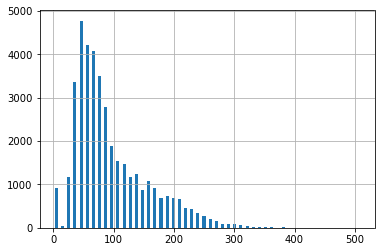

In [7]:
# 3
from matplotlib import pyplot as plt

adr = plt.hist(df['ADR'], bins=50, rwidth=0.5, range=(0, 510))
plt.grid(True)

plt.show()

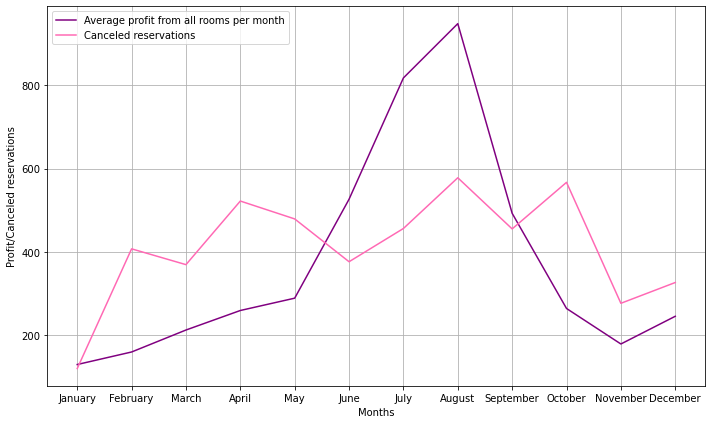

In [8]:
# 4
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df_2016 = df.copy()
df_2016 = df_2016[df_2016['ArrivalDateYear'] == 2016] # Filter out other years

df_2016['profit'] = df_2016['ADR'] * (df_2016['StaysInWeekendNights'] + df_2016['StaysInWeekNights']) #calculate the profit for 2016

avg_price_per_month = df_2016.groupby('ArrivalDateMonth')['profit'].mean() # calculate average profit per month
avg_price_per_month_sorted = avg_price_per_month.reindex(month_names) # sort data based on month

canceled_reservations = df_2016.groupby('ArrivalDateMonth')['IsCanceled'].sum() # sum canceled reservations per month
canceled_reservations_sorted = canceled_reservations.reindex(month_names) # sort data based on month

x = avg_price_per_month_sorted.index # months, our x axis

fig, ax1 = plt.subplots(figsize=[10,6])

ax1.plot(x, avg_price_per_month_sorted.values, label='Average profit from all rooms per month', color='purple') # first plot with average profit per month
ax1.plot(x, canceled_reservations_sorted.values, label='Canceled reservations', color='hotpink') # second plot, sum of canceled reservations
ax1.set_xlabel('Months')
ax1.set_ylabel('Profit/Canceled reservations')
ax1.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
